## 读取用户购买记录

In [3]:
import pandas as pd
m_cols = ['Time','Action','User','Product','Quantity','Price']
orders = pd.read_csv('Data/purchase_order.tab',sep = '\t',parse_dates={'Data': [0]},names=m_cols,encoding='utf-8')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Data        54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [4]:
orders.head()

,Data,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


## 探索用户购买记录

In [5]:
orders['Product'].head()

0       P0006944501
1       P0006018073
2       P0002267974
3       P0016144236
4    P0014516980122
Name: Product, dtype: object

In [17]:
orders[orders['Product'] == 'P0006944501']['Price']

0       1069.0
9       1069.0
775     1069.0
2511    1069.0
2515    1069.0
2522    1069.0
5457    1069.0
5706    1069.0
Name: Price, dtype: float64

In [11]:
orders[orders['Product'] == 'P0006944501']['Price'].mean()#平均值

1069.0

In [15]:
orders[orders['Product'] == 'P0006944501']['Price'].describe()

count       8.0
mean     1069.0
std         0.0
min      1069.0
25%      1069.0
50%      1069.0
75%      1069.0
max      1069.0
Name: Price, dtype: float64

In [16]:
orders[orders['Product'] == 'P0006944501']['Price'].max()#最大值

1069.0

In [19]:
orders['Product'].unique()

array(['P0006944501', 'P0006018073', 'P0002267974', ..., 'P0022884606',
       'P0013911085', 'P0025123755'], dtype=object)

In [20]:
len(orders['Product'].unique())

20054

In [21]:
#获取每个产品的平均价格
orders.groupby('Product')['Price'].mean().head()

Product
P0000005913       1590.0
P0000006020       1290.0
P0000006591        999.0
P0000007744       3280.0
P0000008190011    5083.0
Name: Price, dtype: float64

In [24]:
orders.groupby('Product')['Price'].mean().sort_values(ascending = False).head()#按照降序排列从大到小的前5位

Product
P0000143511    438888.0
P0000143500    438888.0
P0006584093    320000.0
P0025280275    183900.0
P0000150006    111375.0
Name: Price, dtype: float64

In [25]:
orders['Total_Price'] = orders['Quantity'] * orders['Price']

In [26]:
orders.head()

,Data,Action,User,Product,Quantity,Price,Total_Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,249.0


In [29]:
orders.groupby('User')['Total_Price'].sum().sort_values(ascending = False).head()

User
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
U1006283751      515688.0
U10114715330     456782.0
Name: Total_Price, dtype: float64

## 读取用户浏览商品记录

In [30]:
import pandas as pd
m_cols = ['Time','Action','User','Product','Quantity','Price']
views = pd.read_csv('Data/purchase_view.tab',sep = '\t',parse_dates={'Data': [0]},names=m_cols,encoding='utf-8')
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 6 columns):
Data        1191486 non-null datetime64[ns]
Action      1191486 non-null object
User        1191486 non-null object
Product     1191486 non-null object
Quantity    0 non-null float64
Price       0 non-null float64
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 54.5+ MB


In [34]:
views.head()

,Data,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,view,U129297265,P0023468384,NaN,NaN
1,2015-07-01 00:00:03,view,U321001337,P0018926456,NaN,NaN
2,2015-07-01 00:00:05,view,U10070718237,P0000063593,NaN,NaN
3,2015-07-01 00:00:05,view,U393805241,P0005541535,NaN,NaN
4,2015-07-01 00:00:10,view,U10004621134,P0022135540,NaN,NaN


In [33]:
orders_cnt = orders.groupby(['User','Product'])['Product'].count().reset_index(name='buys')
orders_cnt.head()

,User,Product,buys
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


In [35]:
views_cnt = orders.groupby(['User','Product'])['Product'].count().reset_index(name = 'views')

In [36]:
views_cnt.head()

,User,Product,views
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


## 合并购买与浏览数据

In [37]:
merge_df = pd.merge(orders_cnt,views_cnt,on=['User','Product'],how='right')

In [38]:
merge_df.head()

,User,Product,buys,views
0,U1000001354,P0014520085,1,1
1,U10000044910,P0018800250,1,1
2,U10000056953,P0003926850034,1,1
3,U10000056953,P0013344760004,2,2
4,U10000056953,P0013834251,1,1


## 了解使用者在不同日期时间的消费习惯


In [39]:
views.head()

,Data,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,view,U129297265,P0023468384,NaN,NaN
1,2015-07-01 00:00:03,view,U321001337,P0018926456,NaN,NaN
2,2015-07-01 00:00:05,view,U10070718237,P0000063593,NaN,NaN
3,2015-07-01 00:00:05,view,U393805241,P0005541535,NaN,NaN
4,2015-07-01 00:00:10,view,U10004621134,P0022135540,NaN,NaN


In [40]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 6 columns):
Data        1191486 non-null datetime64[ns]
Action      1191486 non-null object
User        1191486 non-null object
Product     1191486 non-null object
Quantity    0 non-null float64
Price       0 non-null float64
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 54.5+ MB


In [43]:
views['Data'].dt.date.head()

0    2015-07-01
1    2015-07-01
2    2015-07-01
3    2015-07-01
4    2015-07-01
Name: Data, dtype: object

In [45]:
views_cnt_by_date = views.groupby(views['Data'].dt.date)['Action'].count()
views_cnt_by_date.head()

Data
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

## 绘制图表

In [46]:
?views_cnt_by_date.plot


Populating the interactive namespace from numpy and matplotlib


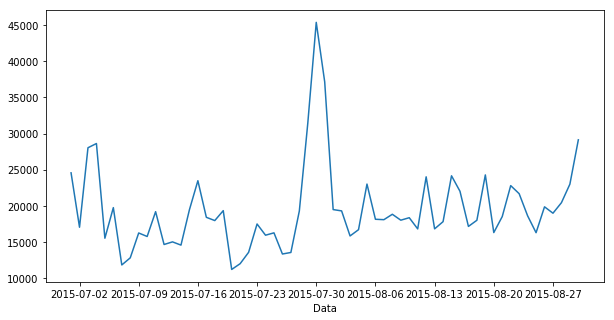

In [47]:
%pylab inline
views_cnt_by_date.plot(kind = 'line',figsize = [10,5])

In [48]:
views_cnt_by_hour = views.groupby(views['Data'].dt.hour)['Action'].count()

Populating the interactive namespace from numpy and matplotlib


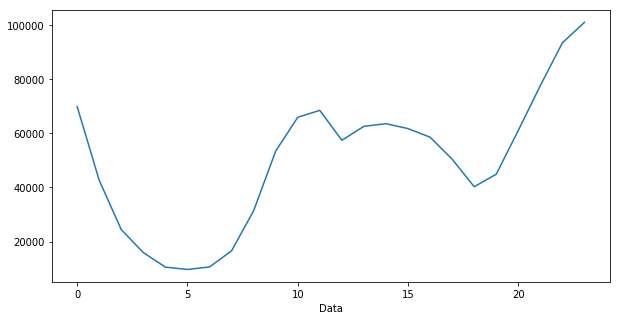

In [49]:
%pylab inline
views_cnt_by_hour.plot(kind = 'line',figsize = [10,5])

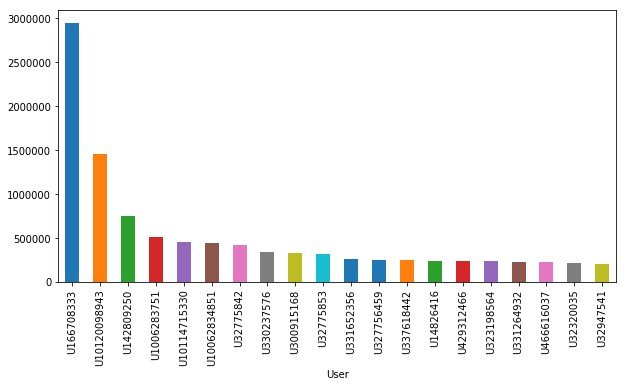

In [52]:
orders['Total_price'] = orders['Quantity'] * orders['Price']
g = orders.groupby('User')['Total_price'].sum().sort_values(ascending = False)[0:20]
g.plot(kind = "bar",figsize = [10,5])

In [55]:
views_daily_cnt = views.groupby(by = views['Data'].dt.date)['Action'].count()
orders_daily_cnt = orders.groupby(by = orders['Data'].dt.date)['Action'].count()
views_daily_cnt.head()

df = pd.concat([views_daily_cnt,orders_daily_cnt],axis= 1)
df.dropna(inplace = True)
df.plot(kind = "line",figsize = [10,5],rot = 30)

Data
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

In [56]:
orders_daily_cnt.head()

Data
2015-07-01    2324
2015-07-02    2059
2015-07-03    1778
2015-07-04    2166
2015-07-05    1413
Name: Action, dtype: int64

In [57]:
df = pd.concat([views_daily_cnt,orders_daily_cnt],axis= 1)
df.dropna(inplace = True)

D:\Anaconda3.6.5fille\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


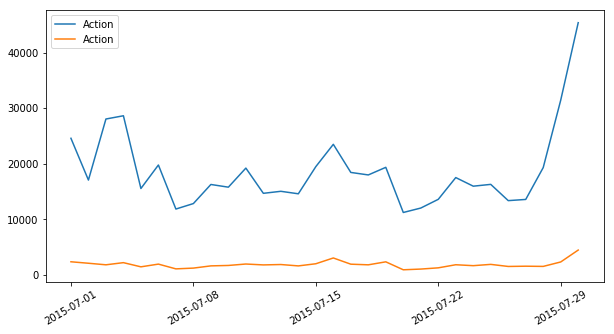

In [58]:
df.plot(kind = "line",figsize = [10,5],rot = 30)